In [1]:
# ---- (a) Loading and Preprocessing the Image Data ----
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Add channel dimension (since MNIST is grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [7]:
# ---- (b) Defining the Model’s Architecture ----
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# ---- (c) Training the Model ----
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.9471 - loss: 0.1688 - val_accuracy: 0.9820 - val_loss: 0.0602
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.9826 - val_loss: 0.0569
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9868 - val_loss: 0.0419
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9862 - val_loss: 0.0445
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9872 - val_loss: 0.0456


In [10]:
# ---- (d) Estimating Model Performance ----
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9884 - loss: 0.0357
Test Accuracy: 98.84%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


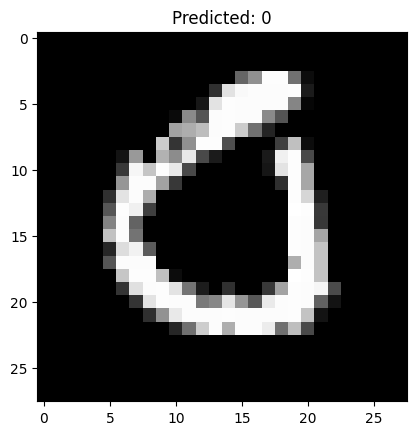

In [16]:
# Predict a random sample
idx = np.random.randint(0, len(x_test))
plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(model.predict(x_test[idx].reshape(1,28,28,1)))}")
plt.show()

In [17]:
pred = model.predict(x_test)
print(np.argmax(pred[idx]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
0
